In [ ]:
#Carga de datos
import pandas as pd
datos=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv")
df=pd.DataFrame(datos)
df.head()

,Fecha,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
0,2020-03-02,1.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,2.0,3.0,0.0,0.0,3.0,NaN,2.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,1.0,4.0,0.0,0.0,4.0,NaN,1.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,1.0,5.0,0.0,0.0,5.0,NaN,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


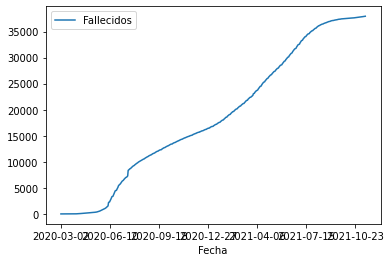

In [ ]:
#Grafico acumulado de fallecidos por día
import matplotlib.pyplot as plt

df.plot(x="Fecha", y="Fallecidos")

  #Los datos acumulados no entrega mucha información para periodos cortos en el tiempo, es mejor ver los nuevos fallecidos por día

In [ ]:
# Crea un data frame (?) calculando los nuevos fallecidos a partir de 
# la diferencia de los fallecidos del dia siguiente con el anterior

nuevosF=df["Fallecidos"].diff()

#Inserta la columna con los nuevos fallecidos

df.insert(1,"Nuevos Fallecidos",nuevosF)

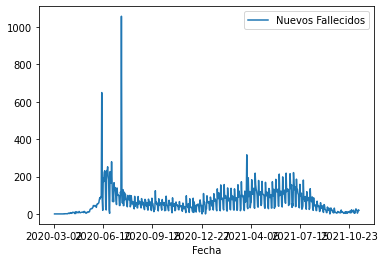

In [ ]:
#Grafica los nuevos fallecidos por día

df.plot(x="Fecha", y="Nuevos Fallecidos")

Se eliminará la fila donde hay un máximo de nuevos fallecidos. Esta 
fila puede "ensuciar" el posterior analisis de los datos. Es posible que ese numero exagerado de nuevos fallecidos sea dado a un mal manejo de la incorporacion de datos al dataset.

In [ ]:
#Se muestran los datos de la fila donde se encuentra el maximo de los nuevos fallecidos
df[df["Nuevos Fallecidos"]==df["Nuevos Fallecidos"].max()]


,Fecha,Nuevos Fallecidos,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
137,2020-07-17,1057.0,2125.0,326539.0,NaN,8347.0,21378.0,545.0,2840.0,38450.0,21378.0,296814.0,279742.0,296814.0,21378.0,40056.0,4922.0,NaN,NaN,NaN,NaN


In [ ]:
#Se obtiene el índice de esa fila
maxF1=df[df["Nuevos Fallecidos"]==df["Nuevos Fallecidos"].max()].index.tolist()
maxF1

[137]

In [ ]:
#Se elimina esa fila del data frame
df=df.drop(maxF1)

In [ ]:
#Se verifica el maximo actual
df["Nuevos Fallecidos"].max()

649.0

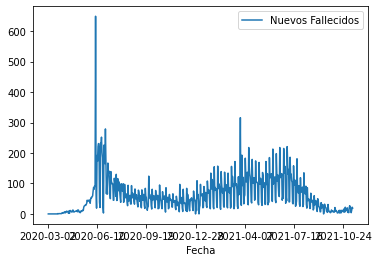

In [ ]:
#Se grafica nuevamente 
df.plot(x="Fecha", y="Nuevos Fallecidos")

Se repite el proceso realizado anteriormente para eliminar el segundo maximo encontrado

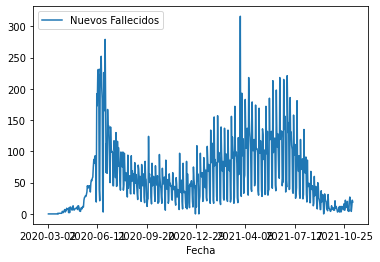

In [ ]:
maxF2=df[df["Nuevos Fallecidos"]==df["Nuevos Fallecidos"].max()].index.tolist()
df=df.drop(maxF2)
df.plot(x="Fecha", y="Nuevos Fallecidos")

Se observa que los datos son ciclicos dificultando el análisis. Se buscará una medida que muestre el promedio de los ultimos 7 días, conocido como media movil.

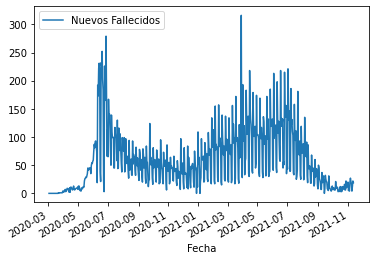

In [ ]:
#Se grafica los nuevos fallecidos

df.plot(x="Fecha", y="Nuevos Fallecidos")

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [ ]:
df['Week_of_Year']=df['Fecha'].dt.isocalendar().week

In [ ]:
df_by_week=df.groupby(by='Week_of_Year').sum()

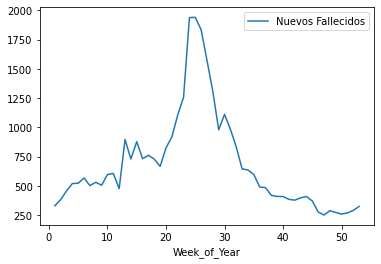

In [ ]:
df_by_week.plot(y="Nuevos Fallecidos")